In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

In [3]:
superheroes = pd.read_csv("superhero_data.csv", parse_dates = ["FIRST_YEAR"])

In [4]:
#introduce the dataframe. From Pandas (pd) library, use DataFrame function and specify the data is coming from 'superheroes'
df = pd.DataFrame(data = superheroes)
print(df)

      UNIVERSE page_id                                   name  \
0           DC    1702             Richard Occult (New Earth)   
1           DC  158200           Arthur Pendragon (New Earth)   
2           DC  289378                   Bedivere (New Earth)   
3           DC   11333  Franklin Delano Roosevelt (New Earth)   
4           DC  342641                     Gareth (New Earth)   
...        ...     ...                                    ...   
23415   MARVEL      ND                  Zola Hulk (Earth-616)   
23416   MARVEL      ND              Zola Iron Man (Earth-616)   
23417   MARVEL      ND                  Zola Thor (Earth-616)   
23418   MARVEL      ND                    Zoltaro (Earth-616)   
23419   MARVEL      ND                Zora Loftus (Earth-616)   

                                     urlslug               ID  \
0                 Richard_Occult_(New_Earth)  Secret Identity   
1               Arthur_Pendragon_(New_Earth)  Public Identity   
2                       

In [6]:
#In this example you will be asked to complete two inputs to compare superheroes.
#Complete the prompted questions to compare characters eye colors and thier Alignment of good and evil.

Eyes1 = input("To start what color eyes are you looking for in your heros? (Brown Eyes, Blue Eyes, Yellow Eyes, Red Eyes, or Purple Eyes)")
Align1 = input("Do you want your characters to be good or bad(Good Characters, Bad Characters)")
character_compare = pd.crosstab(index = superheroes["EYES"] == Eyes1, columns = superheroes["ALIGN"] == Align1)
character_compare.columns = ["Is not " + Align1, "Is " + Align1]
character_compare.index = ["Does not have " + Eyes1, "Has " + Eyes1]
print(character_compare)

        
        
appearance_by_sex = pd.crosstab(superheroes[Eyes1], superheroes[Align1])

To start what color eyes are you looking for in your heros? (Brown Eyes, Blue Eyes, Yellow Eyes, Red Eyes, or Purple Eyes) Blue Eyes
Do you want your characters to be good or bad(Good Characters, Bad Characters) Bad Characters


                         Is not Bad Characters  Is Bad Characters
Does not have Blue Eyes                  11631               8662
Has Blue Eyes                             2173                954


KeyError: 'Blue Eyes'

In [7]:
# Now try and find your own specific character/characters! Note that you may not always get a result with such a refined search. Example is here listed below.
#SPELLING IS IMPORTANT FOR ACCURACY
#Would you like to fall into Marvel or DC commics?(MARVEL, DC) MARVEL
#To start what color eyes are you looking for in your heros? (Brown Eyes, Blue Eyes, Yellow Eyes, Red Eyes, or Purple Eyes) Blue Eyes
#First pick a hair color (White Hair, Black Hair, Red Hair, Brown Hair, Purple Hair, Green Hair, Bald). Bald
#Now chose living or deceased heroes (Living Characters, Deceased Characters) Living Characters
#What month do you want these heros to have appeared in the universe? October
#'Albert Potter (Earth-616)', 'Douglas Scott (Earth-616)', 'Ernest Popchik (Earth-616)'
 
Universe1 = input("Would you like to fall into Marvel or DC commics?(MARVEL, DC)")
Eyes1 = input("To start what color eyes are you looking for in your heros? (Brown Eyes, Blue Eyes, Yellow Eyes, Red Eyes, or Purple Eyes)")
Hair1 = input("First pick a hair color (White Hair, Black Hair, Red Hair, Brown Hair, Purple Hair, Green Hair, Bald).")
Alive1 = input("Now chose living or deceased heroes (Living Characters, Deceased Characters)")
Month1 = input("What month do you want these heros to have appeared in the universe?")
list_name = []

# .shape[0] gives the number of rows, .shape[1] gives the number of columns
num_rows = df.shape[0]

#printing is a good way to check our work
#to print out row 0 of Appearances column
#print(df["APPEARANCES"] [0])


#use a for loop to go through all of the rows
#for each row in the total rows of the dataframe for our file
for row in range(num_rows):
    
    #use 'continue' to skip any instance with no data (ND) about the number of appearances
    if(df["EYES"][row]=="ND"):
        continue
        
    #this is the main line of code that does what we want.    
    elif(df["EYES"][row] == Eyes1 and (df["ALIVE"][row] == Alive1) and (df["HAIR"][row] == Hair1) and (df["FIRST_MONTH"][row] == Month1) and (df["UNIVERSE"][row] == Universe1)):
        list_name.append(df["name"][row])

print("\n Here is the list of all of the corresponding heros!" + str(list_name))

    

Would you like to fall into Marvel or DC commics?(MARVEL, DC) MARVEL
To start what color eyes are you looking for in your heros? (Brown Eyes, Blue Eyes, Yellow Eyes, Red Eyes, or Purple Eyes) Red Eyes
First pick a hair color (White Hair, Black Hair, Red Hair, Brown Hair, Purple Hair, Green Hair, Bald). Brown Hair
Now chose living or deceased heroes (Living Characters, Deceased Characters) Living Characters
What month do you want these heros to have appeared in the universe? September



 Here is the list of all of the corresponding heros!['Eon (Earth-616)']


In [ ]:
#This is a notes tab where I wanted to compare the numbers I was getting below. Also credit the youtubers I watched they are written at the end of my code 
#and, not, or  boolean operators
#<, <=, >, !=, ==  arithemetic operators
#df["SEX"].value_counts().plot(kind="bar")
#before1980 = df((df["SEX"].value_counts(normalize=True)== "Male Characters") and (df["FIRST_YEAR"].value_counts(normalize=True)<= str(1980))
#df["SEX"].value_counts()
#Male Characters           16521
#Female Characters          5853
#ND                          978
#Agender Characters           45
#Genderless Characters        20
#Genderfluid Characters        2
#Transgender Characters        1
#Name: SEX, dtype: int64

Pick a year to see how many female characters were made before and after that year. 1977


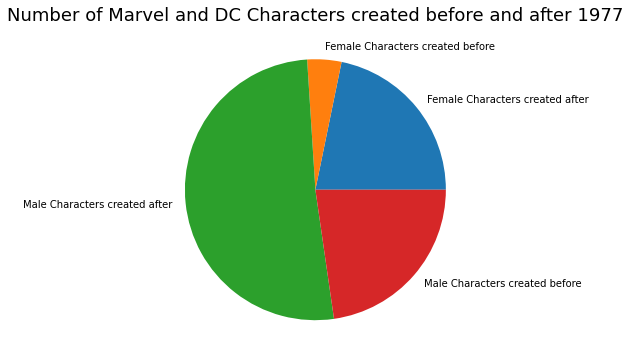

In [17]:
# This question is used to find the where the unequal balances in superheroes was created.
# Enter a year to see how many male and female characters were created before that year and after that year.


list_womensa = []
list_mensa = []
list_womensb = []
list_mensb = []

num_rows = df.shape[0]

over1980 = input("Pick a year to see how many female characters were made before and after that year.")

for row in range(num_rows):
    if(df["FIRST_YEAR"][row]=="ND") or (df["SEX"][row]=="ND"):
        continue
    elif(df["FIRST_YEAR"][row] >= over1980 and (df["SEX"][row] == "Female Characters")):
        list_womensa.append(df["name"][row])

for row in range(num_rows):
    if(df["FIRST_YEAR"][row]=="ND") or (df["SEX"][row]=="ND"):
        continue
    elif(df["FIRST_YEAR"][row] >= over1980 and (df["SEX"][row] == "Male Characters")):
        list_mensa.append(df["name"][row])
        
for row in range(num_rows):
    if(df["FIRST_YEAR"][row]=="ND") or (df["SEX"][row]=="ND"):
        continue
    elif(df["FIRST_YEAR"][row] <= over1980 and (df["SEX"][row] == "Female Characters")):
        list_womensb.append(df["name"][row])

for row in range(num_rows):
    if(df["FIRST_YEAR"][row]=="ND") or (df["SEX"][row]=="ND"):
        continue
    elif(df["FIRST_YEAR"][row] <= over1980 and (df["SEX"][row] == "Male Characters")):
        list_mensb.append(df["name"][row])
        
        
# print the total number of characters in the data
#print("\nTotal number of characters: " + str(len(superhero)))
#print("\nTotal number of female characters created after: " + str(len(list_womensa)))
#print("\nTotal number of males characters created after: " + str(len(list_mensa)))
#print("\nTotal number of female characters created before: " + str(len(list_womensb)))
#print("\nTotal number of males characters created before: " + str(len(list_mensb)))

chart_values = [str(len(list_womensa)),str(len(list_womensb)),str(len(list_mensa)),str(len(list_mensb))]
chart_labels = ["Female Characters created after","Female Characters created before","Male Characters created after","Male Characters created before"]

plt.axis('equal')
plt.title("Number of Marvel and DC Characters created before and after " + over1980, fontsize = 18)
plt.pie(chart_values,labels=chart_labels)
plt.show()


In [ ]:
#The Credit Page
#Alot of the ideas are extentions of the work we did in class. I just wanted something where the user can easily adjust inputs
#Data School on youtube as well as Datagy on youtube. The functions they listed were actually much more complex so I did not use all of them, but I drew inspiration on them.
